In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/bombay_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,27.5,16,42,67,10,660.0,57.2767,40.09369
1,2016-01-01 01:00:00,27.5,16,42,66,10,660.0,58.6719,41.07033
2,2016-01-01 02:00:00,27.5,16,41,65,9,660.0,59.0045,41.30315
3,2016-01-01 03:00:00,27.5,16,41,64,9,660.0,60.3094,42.21658
4,2016-01-01 04:00:00,27.5,16,40,64,9,660.0,60.3100,42.21700


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,27.5,16,42,67,10,660.0,57.2767,40.09369
1,2016-01-01 01:00:00,27.5,16,42,66,10,660.0,58.6719,41.07033
2,2016-01-01 02:00:00,27.5,16,41,65,9,660.0,59.0045,41.30315
3,2016-01-01 03:00:00,27.5,16,41,64,9,660.0,60.3094,42.21658
4,2016-01-01 04:00:00,27.5,16,40,64,9,660.0,60.3100,42.21700


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,462.990453
std,425.002576
min,39.037040
25%,193.873820
50%,326.923485
75%,575.951757
max,2570.919750


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_10536\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


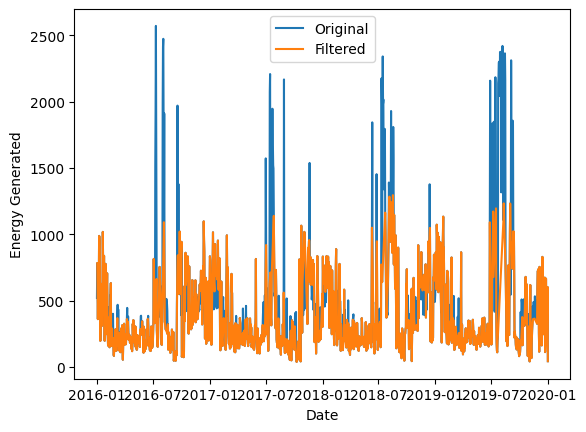

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,366.728897,25.606987,14.088210,53.969432,202.274236,9.409607,678.996507,26.611038
std,266.938643,1.407132,1.710235,10.416918,123.423173,4.047672,13.854892,32.335854
min,39.037040,23.000000,10.000000,33.000000,0.000000,1.000000,660.000000,1.242200
25%,176.994930,24.500000,13.000000,46.000000,66.000000,6.000000,667.000000,2.404700
50%,254.627730,26.000000,14.000000,53.000000,242.000000,9.000000,678.000000,11.657500
75%,576.163210,26.500000,15.000000,62.000000,316.000000,12.000000,691.000000,37.986700
max,1295.930020,29.000000,19.000000,82.000000,360.000000,23.000000,706.000000,124.451200


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

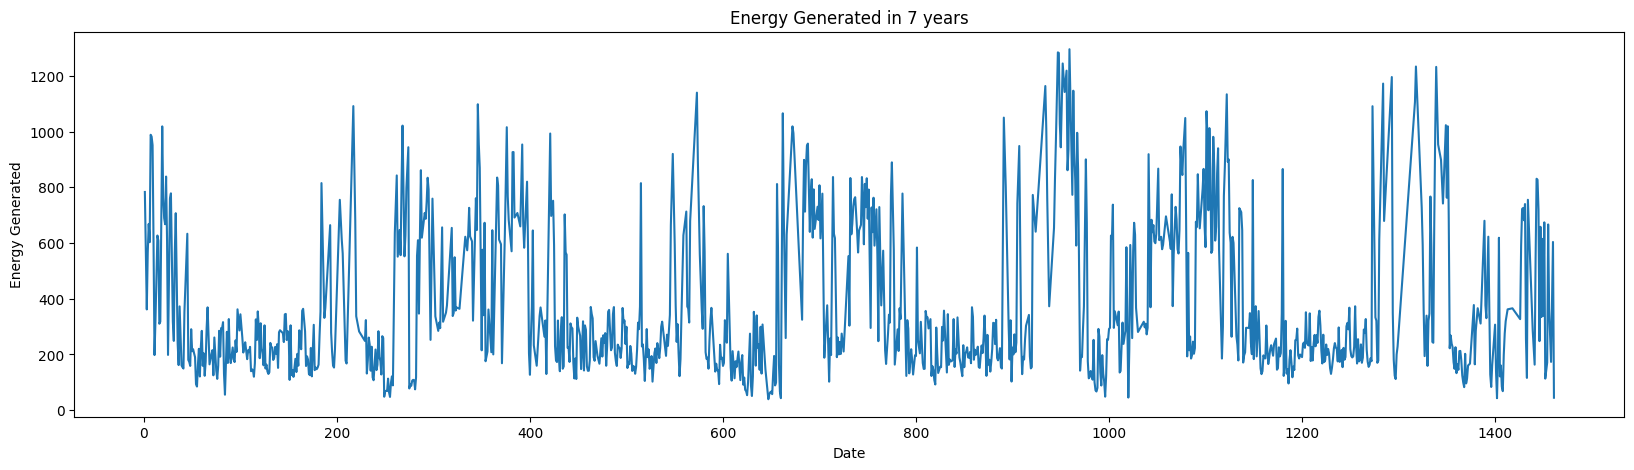

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1158,2019-03-04,129.14181,26.0,14,61,4,7,694.0,39.8832,3,63,0,0,1
1159,2019-03-05,139.86868,26.0,14,56,90,6,694.0,10.9556,3,64,0,0,1
1160,2019-03-06,196.56805,26.0,15,52,177,5,694.0,18.6127,3,65,0,0,1
1161,2019-03-07,186.48210,26.0,15,48,264,4,694.0,1.6799,3,66,0,0,1
1162,2019-03-08,185.60010,26.0,14,48,271,9,694.0,1.4241,3,67,0,0,1


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.633942275671752
p-value: 5.623971628250178e-09
Critical Values: {'1%': -3.4361093249345402, '5%': -2.8640831032339706, '10%': -2.5681240143809787}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1,2016-01-02,783.29027,27.5,16,42,66,10,660.0,58.6719,1,2,0,1,0
2,2016-01-03,568.95503,27.5,16,41,65,9,660.0,59.0045,1,3,0,1,0
3,2016-01-04,361.50709,27.5,16,41,64,9,660.0,60.3094,1,4,0,1,0
4,2016-01-05,567.30086,27.5,16,40,64,9,660.0,60.3100,1,5,0,1,0
5,2016-01-06,668.56559,27.5,17,39,64,9,660.0,60.6474,1,6,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15245.223, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16046.642, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15300.947, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15582.197, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17259.410, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15247.516, Time=0.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15243.971, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15272.906, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15284.303, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15244.965, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=15270.894, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15262.574, Time=0.42 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 7.703 seconds


In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(9,2,5))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  916
Model:                 ARIMA(9, 2, 5)   Log Likelihood               -6081.621
Date:                Thu, 29 Jun 2023   AIC                          12193.242
Time:                        13:30:49   BIC                          12265.509
Sample:                             0   HQIC                         12220.828
                                - 916                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0228      0.229     -8.828      0.000      -2.472      -1.574
ar.L2         -2.6507      0.280     -9.463      0.000      -3.200      -2.102
ar.L3         -3.0483      0.373     -8.167      0.000      -3.780      -2.317
ar.L4         -2.4616      0.375     -6.565      0.000      -3.196      -1.727
ar.L5         -1.5308      0.253     -6.046      0.000      -2.027      -1.035
ar.L6         -1.0397      0.199     -5.228      0.000      -1.429      -0.650
ar.L7         -0.5466      0.145     -3.760      0.000      -0.831      -0.262
ar.L8         -0.2266      0.087     -2.600      0.009      -0.397      -0.056
ar.L9         -0.0749      0.043     -1.731      0.083      -0.160       0.010
ma.L1          0.6487      0.233      2.784      0.005       0.192       1.105
ma.L2          0.0526      0.148      0.356      0.722      -0.237       0.342
ma.L3         -0.1187      0.156     -0.762      0.446      -0.424       0.187
ma.L4         -0.8625      0.149     -5.791      0.000      -1.154      -0.571
ma.L5         -0.7172      0.180     -3.975      0.000      -1.071      -0.364
sigma2      3.727e+04   2357.539     15.807      0.000    3.26e+04    4.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               306.32
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.43
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1158    284.510158
1159    208.435597
1160    262.484911
1161    241.586386
1162    257.683369
           ...    
1455    154.347266
1456    152.855929
1458    151.600353
1460    152.235542
1461    152.640477
Name: predicted_mean, Length: 229, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


28.068704633387036



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(5, 1, 2), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 29.901333096856227
Forecasted energy generation: 1158    246.786242
1159    244.118149
1160    294.558211
1161    281.698104
1162    285.941659
           ...    
1455    639.396421
1456    655.109027
1458    694.344604
1460    704.069431
1461    703.213824
Name: predicted_mean, Length: 229, dtype: float64


## Using AutoRegression Model

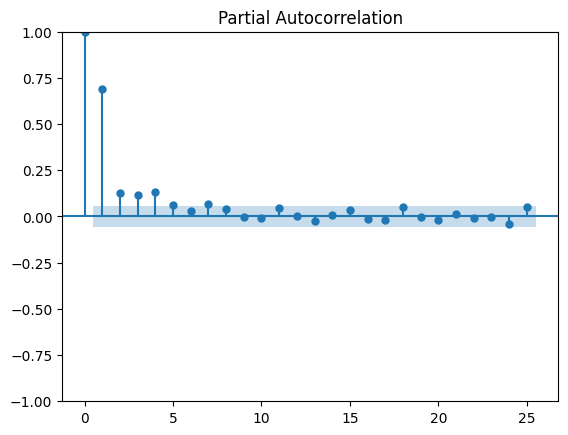

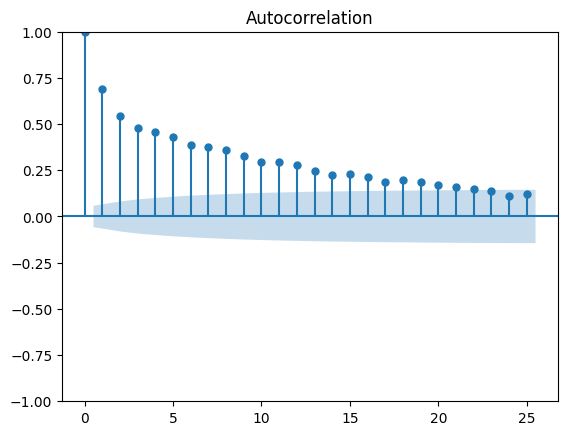

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=2).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  916
Model:                     AutoReg(2)   Log Likelihood               -6084.601
Method:               Conditional MLE   S.D. of innovations            188.326
Date:                Thu, 29 Jun 2023   AIC                          12177.203
Time:                        13:30:53   BIC                          12196.474
Sample:                             2   HQIC                         12184.559
                                  916                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 94.9627     11.298      8.405      0.000      72.819     117.106
EnergyGenerated.L1     0.6249      0.033     19.028      0.000       0.561       0.689
EnergyGenerated.L2  

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1158    232.317714
1159    258.567298
1160    285.115950
1161    304.934718
1162    320.584453
           ...    
1455    376.675617
1456    376.675617
1458    376.675617
1460    376.675617
1461    376.675617
Length: 229, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


25.022188938756656


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(2, 0, 1), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 24.28619357201959
Forecasted energy generation: 1158    180.258725
1159    161.622312
1160    147.910917
1161    155.518727
1162    154.182817
           ...    
1455    609.316593
1456    643.835327
1458    696.800947
1460    658.948024
1461    657.930562
Name: predicted_mean, Length: 229, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,522.23395
1,2016-01-02,783.29027
2,2016-01-03,568.95503
3,2016-01-04,361.50709
4,2016-01-05,567.30086


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:30:59 - cmdstanpy - INFO - Chain [1] start processing
13:30:59 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1326,2020-04-17,526.887267,100.295040,621.102486,520.611857,532.867335,-171.116024,-171.116024,-171.116024,-7.777861,-7.777861,-7.777861,-163.338163,-163.338163,-163.338163,0.0,0.0,0.0,355.771243
1327,2020-04-18,527.041393,108.507154,645.202841,520.728292,533.047103,-153.787907,-153.787907,-153.787907,8.471222,8.471222,8.471222,-162.259129,-162.259129,-162.259129,0.0,0.0,0.0,373.253486
1328,2020-04-19,527.195520,109.617991,652.493213,520.851323,533.237946,-143.126837,-143.126837,-143.126837,17.979452,17.979452,17.979452,-161.106288,-161.106288,-161.106288,0.0,0.0,0.0,384.068683
1329,2020-04-20,527.349646,110.910066,637.860534,520.983944,533.428790,-160.266770,-160.266770,-160.266770,-0.348320,-0.348320,-0.348320,-159.918451,-159.918451,-159.918451,0.0,0.0,0.0,367.082876
1330,2020-04-21,527.503772,139.523377,658.171246,521.125820,533.619633,-144.625601,-144.625601,-144.625601,14.111343,14.111343,14.111343,-158.736944,-158.736944,-158.736944,0.0,0.0,0.0,382.878172


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1326,2020-04-17,355.771243,100.295040,621.102486
1327,2020-04-18,373.253486,108.507154,645.202841
1328,2020-04-19,384.068683,109.617991,652.493213
1329,2020-04-20,367.082876,110.910066,637.860534
1330,2020-04-21,382.878172,139.523377,658.171246


In [34]:
df_prophet_test.tail()

,ds,y
1455,2019-12-26,666.65872
1456,2019-12-27,364.11291
1458,2019-12-29,173.09005
1460,2019-12-31,603.75896
1461,2020-01-01,44.44951


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-229:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

34.766136427019404


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 25.022188938756656
Root Mean Square error for ARIMA : 28.068704633387036
Root Mean Square error for SARIMA : 24.28619357201959
Root Mean Square error for ARIMA with features : 29.901333096856227
Root Mean Square error for Prophet : 34.766136427019404
